## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

In [309]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import sqlite3
import seaborn as sns
%matplotlib inline

# A. DATA

# 1. bom_movie dataframe

In [310]:
bom_movie = pd.read_csv('zippedData/bom.movie_gross.csv')
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [311]:
bom_movie['title_year'] = bom_movie.title + bom_movie['year'].astype(str)
bom_movie

,title,studio,domestic_gross,foreign_gross,year,title_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 32010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010)2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 12010
3,Inception,WB,292600000.0,535700000,2010,Inception2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,The Quake2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,Edward II (2018 re-release)2018
3384,El Pacto,Sony,2500.0,NaN,2018,El Pacto2018
3385,The Swan,Synergetic,2400.0,NaN,2018,The Swan2018


# 2. tmdb_movie dataframe

In [346]:
tmdb_movie = pd.read_csv('zippedData/tmdb.movies.csv')
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [409]:
tmdb_movie.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count,release_month
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837,6.405966
std,7654.94288,153661.615648,4.355229,1.852946,960.961095,3.573796
min,0.00000,27.000000,0.600000,0.000000,1.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000,3.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000,6.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000,10.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000,12.000000


In [347]:
tmdb_movie[tmdb_movie.original_title =="Avatar"]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676


In [348]:
tmdb_movie['release_month'] = tmdb_movie['release_date'].map(lambda x: pd.to_datetime(x).month)
tmdb_movie['release_year'] = tmdb_movie['release_date'].map(lambda x: x[:4])
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,release_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,2010


In [350]:
tmdb_movie['title_year'] = tmdb_movie['title'] + tmdb_movie['release_year'].astype(str)
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,release_year,title_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,2010,Harry Potter and the Deathly Hallows: Part 12010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,2010,How to Train Your Dragon2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,2010,Iron Man 22010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,1995,Toy Story1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,2010,Inception2010


In [316]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
 10  release_month      26517 non-null  int64  
 11  release_year       26517 non-null  object 
 12  title_year         26517 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.6+ MB


# 3. tn_movie dataframe

In [317]:
tn_movie = pd.read_csv('zippedData/tn.movie_budgets.csv')
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [318]:
tn_movie['release_month'] = tn_movie['release_date'].map(lambda x: pd.to_datetime(x).month)
tn_movie['release_year'] = tn_movie['release_date'].map(lambda x: x[-4:])
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12,2017


In [319]:
tn_movie['movie_year'] = tn_movie['movie'] + tn_movie['release_year'].astype(str)

In [320]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12,2009,Avatar2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5,2011,Pirates of the Caribbean: On Stranger Tides2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6,2019,Dark Phoenix2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5,2015,Avengers: Age of Ultron2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12,2017,Star Wars Ep. VIII: The Last Jedi2017


In [321]:
tn_movie[tn_movie['movie'] =="Coco"]        

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year
101,2,"Nov 22, 2017",Coco,"$175,000,000","$209,726,015","$798,008,101",11,2017,Coco2017


In [322]:
tn_movie.shape

(5782, 9)

In [323]:
# turn production_budget column in numeric values:
tn_movie["production_budget"] = [str(i).replace("$", "") for i in tn_movie["production_budget"]]
tn_movie["production_budget"] = [float(str(i).replace(",", "")) for i in tn_movie["production_budget"]]

In [324]:
tn_movie["domestic_gross"] = [str(i).replace("$", "") for i in tn_movie["domestic_gross"]]
tn_movie["domestic_gross"] = [float(str(i).replace(",", "")) for i in tn_movie["domestic_gross"]]


In [325]:
tn_movie["worldwide_gross"] = [str(i).replace("$", "") for i in tn_movie["worldwide_gross"]]
tn_movie["worldwide_gross"] = [float(str(i).replace(",", "")) for i in tn_movie["worldwide_gross"]]

In [326]:
tn_movie['international_gross'] = tn_movie.worldwide_gross - tn_movie.domestic_gross
tn_movie['domestic_profit'] = tn_movie.domestic_gross - tn_movie.production_budget
tn_movie['international_profit'] = tn_movie.international_gross - tn_movie.production_budget
tn_movie['worldwide_profit'] = tn_movie.worldwide_gross - tn_movie.production_budget
tn_movie['domestic_ROI'] = (tn_movie.domestic_gross - tn_movie.production_budget)/tn_movie.production_budget
tn_movie['international_ROI'] = (tn_movie.international_gross - tn_movie.production_budget)/tn_movie.production_budget
tn_movie['worldwide_ROI'] = (tn_movie.worldwide_gross - tn_movie.production_budget)/tn_movie.production_budget

In [327]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,12,2009,Avatar2009,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017,Star Wars Ep. VIII: The Last Jedi2017,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,0.956408,1.197288,3.153696


In [328]:
tn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5782 non-null   int64  
 1   release_date          5782 non-null   object 
 2   movie                 5782 non-null   object 
 3   production_budget     5782 non-null   float64
 4   domestic_gross        5782 non-null   float64
 5   worldwide_gross       5782 non-null   float64
 6   release_month         5782 non-null   int64  
 7   release_year          5782 non-null   object 
 8   movie_year            5782 non-null   object 
 9   international_gross   5782 non-null   float64
 10  domestic_profit       5782 non-null   float64
 11  international_profit  5782 non-null   float64
 12  worldwide_profit      5782 non-null   float64
 13  domestic_ROI          5782 non-null   float64
 14  international_ROI     5782 non-null   float64
 15  worldwide_ROI        

# 4. rt_movie dateframe

In [329]:
rt_movie = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
rt_movie.head()

,,,,,,,,,,,<<<<<<< HEAD
id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,"Illeana Douglas delivers a superb performance as Denise Waverly, a fictional singer and songwriter whose life bears more than a passing resemblance to that of real-life pop star Carole King. Edna Buxton, the daughter of a Philadelphia steel tycoon, aspires to a career as a singer, and when against her mother's bidding she sings a sultry version of ""Hey There (You With the Stars in Your Eyes)"" (instead of Mom's choice, ""You'll Never Walk Alone"") at a talent contest, she wins a recording contact and moves to New York City. She cuts a record and gains a new stage name, Denise Waverly; however, she soon finds that girl singers are a dime a dozen in the Big Apple and her career as a vocalist goes nowhere. But she has a knack for writing songs, and eccentric producer Joel Milner (John Turturro) asks her to pen some songs for his upcoming projects. 

# 5. rt_reviews dataframe

In [330]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t',encoding='latin-1')
rt_reviews.head()

/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/1384396749.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t',encoding='latin-1')


<<<<<<< HEAD
id review                                             rating fresh  critic         top_critic publisher                      date
3  A distinctly gallows take on contemporary finan... 3/5    fresh  PJ Nabarro     0          Patrick Nabarro   November 10, 2018
   It's an allegory in search of a meaning that ne... NaN    rotten Annalee Newitz 0          io9.com                May 23, 2018
   ... life lived in a bubble in financial dealing... NaN    fresh  Sean Axmaker   0          Stream on Demand    January 4, 2018
   Continuing along a line introduced in last year... NaN    fresh  Daniel Kasman  0          MUBI              November 16, 2017

# 6. db sql file

In [331]:
con = sqlite3.connect('zippedData/im.db')
cursor_obj = con.cursor()

In [332]:
%%bash 

sqlite3 zippedData/im.db
.tables

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      


# 6.1. director

In [334]:
im_query =  \
"""
SELECT *
FROM directors
"""

In [333]:
directors_df = pd.read_sql("""
SELECT *
FROM directors
""", con)

In [28]:
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [335]:
directors_df.shape

(291174, 2)

In [336]:
directors_df['diretor_id'] = directors_df['person_id'].copy()
directors_df.head()

,movie_id,person_id,diretor_id
0,tt0285252,nm0899854,nm0899854
1,tt0462036,nm1940585,nm1940585
2,tt0835418,nm0151540,nm0151540
3,tt0835418,nm0151540,nm0151540
4,tt0878654,nm0089502,nm0089502


In [337]:
directors_df.diretor_id.nunique()

109253

In [338]:
#Remove dubplicate:
directors_df = directors_df.drop_duplicates(keep="first")
directors_df.head()

,movie_id,person_id,diretor_id
0,tt0285252,nm0899854,nm0899854
1,tt0462036,nm1940585,nm1940585
2,tt0835418,nm0151540,nm0151540
4,tt0878654,nm0089502,nm0089502
5,tt0878654,nm2291498,nm2291498


In [33]:
directors_df.shape

(163535, 3)

# 6.2. movie_akas

In [339]:
movie_akas_df = pd.read_sql("""
SELECT *
FROM movie_akas
""", con)
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


# 6.3. movie_ratings

In [340]:
movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
""", con)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# 6.4. principals

In [341]:
principals_df = pd.read_sql("""
SELECT *
FROM principals
""", con)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


# 6.5. known_for

In [38]:
known_for_df = pd.read_sql("""
SELECT *
FROM known_for
""", con)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


# 6.6. movie_basics

In [361]:
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
""", con)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [362]:
movie_basics_df['title_year'] = movie_basics_df['primary_title'] + movie_basics_df['start_year'].astype(str)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera2017


In [363]:
movie_basics_df[movie_basics_df.primary_title == "Avatar"]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror,Avatar2011


# 6.7. persons

In [343]:
persons_df = pd.read_sql("""
SELECT *
FROM persons
""", con)
persons_df.head()


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


# 6.8. writers

In [344]:
writers_df = pd.read_sql("""
SELECT *
FROM writers
""", con)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


# 7. Genrelookup from https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

In [44]:
genre_lookup_df = pd.read_csv('zippedData/genrelookup-internet.csv')
genre_lookup_df.head()

,Genre type,Genre code
0,Action,28
1,Adventure,12
2,Animation,16
3,Comedy,35
4,Crime,80


In [415]:
a = list (genre_lookup_df['Genre code'])
b = list (genre_lookup_df['Genre type'])
genre_dict = dict((zip(a, b)))
genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

# B-WORKING DATA

In [365]:
#Merge "tn_movie" dataframe with "movie_basics":

tnmovie_basics = pd.merge(tn_movie,movie_basics_df, left_on = "movie_year",right_on ="title_year", how = "inner" )
tnmovie_basics.head(30)

# movie_basics_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,domestic_ROI,international_ROI,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,-0.412899,0.959571,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011
1,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,1.070000e+08,...,-0.877822,-0.694286,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,0.388403,1.855439,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,1.262718,3.564396,5.827114,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,-0.236586,0.423070,1.186484,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017
5,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,11,2015,Spectre2015,6.795467e+08,...,-0.333086,1.265156,1.932070,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",Spectre2015
6,11,"Jul 20, 2012",The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,7,2012,The Dark Knight Rises2012,6.363000e+08,...,0.629597,1.313818,2.943415,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",The Dark Knight Rises2012
7,12,"May 25, 2018",Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,5,2018,Solo: A Star Wars Story2018,1.793838e+08,...,-0.222664,-0.347695,0.429641,tt3778644,Solo: A Star Wars Story,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",Solo: A Star Wars Story2018
8,13,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,2.600021e+08,7,2013,The Lone Ranger2013,1.707000e+08,...,-0.675265,-0.379273,-0.054538,tt1210819,The Lone Ranger,The Lone Ranger,2013,150.0,"Action,Adventure,Western",The Lone Ranger2013
9,14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,3,2012,John Carter2012,2.097194e+08,...,-0.734332,-0.237384,0.028284,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",John Carter2012


In [354]:
tnmovie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1547 non-null   int64  
 1   release_date          1547 non-null   object 
 2   movie                 1547 non-null   object 
 3   production_budget     1547 non-null   float64
 4   domestic_gross        1547 non-null   float64
 5   worldwide_gross       1547 non-null   float64
 6   release_month         1547 non-null   int64  
 7   release_year          1547 non-null   object 
 8   movie_year            1547 non-null   object 
 9   international_gross   1547 non-null   float64
 10  domestic_profit       1547 non-null   float64
 11  international_profit  1547 non-null   float64
 12  worldwide_profit      1547 non-null   float64
 13  domestic_ROI          1547 non-null   float64
 14  international_ROI     1547 non-null   float64
 15  worldwide_ROI        

In [355]:
#Copy "genres" column and create a new column called "each_genre"
tnmovie_basics.loc[:, 'each_genre'] = tnmovie_basics['genres'].copy()
tnmovie_basics.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,international_ROI,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year,each_genre
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,0.959571,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,1.070000e+08,...,-0.694286,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,1.855439,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,3.564396,5.827114,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,0.423070,1.186484,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,"Action,Adventure,Fantasy"


In [356]:
#Sort string in "genres" columns in anphabet order:
tnmovie_basics.loc[:, 'genres'] = tnmovie_basics['genres'].apply(lambda x: ', '.join(sorted(x.split(', '))) if x is not None else '')

tnmovie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1547 non-null   int64  
 1   release_date          1547 non-null   object 
 2   movie                 1547 non-null   object 
 3   production_budget     1547 non-null   float64
 4   domestic_gross        1547 non-null   float64
 5   worldwide_gross       1547 non-null   float64
 6   release_month         1547 non-null   int64  
 7   release_year          1547 non-null   object 
 8   movie_year            1547 non-null   object 
 9   international_gross   1547 non-null   float64
 10  domestic_profit       1547 non-null   float64
 11  international_profit  1547 non-null   float64
 12  worldwide_profit      1547 non-null   float64
 13  domestic_ROI          1547 non-null   float64
 14  international_ROI     1547 non-null   float64
 15  worldwide_ROI        

In [357]:
tnmovie_basics.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_month', 'release_year', 'movie_year',
       'international_gross', 'domestic_profit', 'international_profit',
       'worldwide_profit', 'domestic_ROI', 'international_ROI',
       'worldwide_ROI', 'movie_id', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'title_year', 'each_genre'],
      dtype='object')

In [269]:
#Split "each_genre" row into multiple rows:
split_tnmovie_basics = tnmovie_basics.set_index(['movie', 'domestic_gross','international_gross',
       'worldwide_gross', 'domestic_profit', 'international_profit','worldwide_profit', 'domestic_ROI', 'international_ROI','release_month', 'release_year', 'movie_year',
       'worldwide_ROI', 'production_budget', 'movie_id', 'primary_title', 'original_title','id', 'release_date',
       'start_year', 'runtime_minutes', 'genres', 'title_year']).apply(lambda x: x.str.split(',').explode()).reset_index()
split_tnmovie_basics.head()

,movie,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,...,id,release_date,start_year,runtime_minutes,genres,title_year,each_genre,main_genre,sub_genre1,sub_genre2
0,Pirates of the Caribbean: On Stranger Tides,241063875.0,804600000.0,1.045664e+09,-169536125.0,394000000.0,635063875.0,-0.412899,0.959571,5,...,2,"May 20, 2011",2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Action,Action,Adventure,Fantasy
1,Pirates of the Caribbean: On Stranger Tides,241063875.0,804600000.0,1.045664e+09,-169536125.0,394000000.0,635063875.0,-0.412899,0.959571,5,...,2,"May 20, 2011",2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,Action,Adventure,Fantasy
2,Pirates of the Caribbean: On Stranger Tides,241063875.0,804600000.0,1.045664e+09,-169536125.0,394000000.0,635063875.0,-0.412899,0.959571,5,...,2,"May 20, 2011",2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Fantasy,Action,Adventure,Fantasy
3,Dark Phoenix,42762350.0,107000000.0,1.497624e+08,-307237650.0,-243000000.0,-200237650.0,-0.877822,-0.694286,6,...,3,"Jun 7, 2019",2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Action,Action,Adventure,Sci-Fi
4,Dark Phoenix,42762350.0,107000000.0,1.497624e+08,-307237650.0,-243000000.0,-200237650.0,-0.877822,-0.694286,6,...,3,"Jun 7, 2019",2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Adventure,Action,Adventure,Sci-Fi


In [271]:
split_tnmovie_basics[['main_genre','sub_genre1','sub_genre2']] = split_tnmovie_basics.genres.str.split(",",expand=True)
split_tnmovie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie                 3887 non-null   object 
 1   domestic_gross        3887 non-null   float64
 2   international_gross   3887 non-null   float64
 3   worldwide_gross       3887 non-null   float64
 4   domestic_profit       3887 non-null   float64
 5   international_profit  3887 non-null   float64
 6   worldwide_profit      3887 non-null   float64
 7   domestic_ROI          3887 non-null   float64
 8   international_ROI     3887 non-null   float64
 9   release_month         3887 non-null   int64  
 10  release_year          3887 non-null   object 
 11  movie_year            3887 non-null   object 
 12  worldwide_ROI         3887 non-null   float64
 13  production_budget     3887 non-null   float64
 14  movie_id              3887 non-null   object 
 15  primary_title        

In [272]:
mean_profit_by_genre = split_tnmovie_basics.groupby('each_genre').mean(numeric_only = True).sort_values('worldwide_profit',ascending = False)
mean_profit_by_genre.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,worldwide_ROI,production_budget,id,start_year,runtime_minutes
each_genre,,,,,,,,,,,,,,
Animation,"135,184,389.19","238,325,778.94","373,510,168.13","37,855,957.81","140,997,347.57","276,181,736.75",0.37,1.27,7.117647,2.64,"97,328,431.37",44.941176,2014.215686,94.53
Musical,"121,651,825.00","197,715,139.56","319,366,964.56","56,551,825.00","132,615,139.56","254,266,964.56",-0.03,0.96,7.666667,1.93,"65,100,000.00",36.000000,2012.777778,115.11
Sci-Fi,"125,058,209.60","217,879,589.57","342,937,799.17","31,237,537.96","124,058,917.93","249,117,127.53",0.54,1.07,6.664179,2.61,"93,820,671.64",49.798507,2014.358209,114.31
Adventure,"123,203,054.62","225,154,737.27","348,357,791.90","17,132,261.42","119,083,944.07","242,286,998.69",0.18,0.87,6.974504,2.06,"106,070,793.20",47.671388,2014.291785,111.15
Fantasy,"83,787,249.99","160,797,723.60","244,584,973.60","-1,388,153.23","75,622,320.38","159,409,570.37",0.40,0.74,6.701613,2.14,"85,175,403.23",50.540323,2013.927419,111.19
Action,"85,755,130.85","151,000,917.46","236,756,048.31","7,165,462.71","72,411,249.32","158,166,380.17",0.03,0.54,6.685841,1.58,"78,589,668.14",50.601770,2014.121681,112.07
Family,"77,376,023.97","113,879,556.67","191,255,580.64","10,731,287.13","47,234,819.83","124,610,843.80",0.33,0.16,7.536842,1.49,"66,644,736.84",54.389474,2013.442105,105.88
Comedy,"57,999,791.27","74,518,401.01","132,518,192.27","17,807,931.92","34,326,541.66","92,326,332.93",0.67,0.46,7.188825,2.13,"40,191,859.34",50.448940,2013.610790,102.45
Thriller,"43,072,189.00","69,012,905.17","112,085,094.17","10,772,245.16","36,712,961.32","79,785,150.32",1.96,2.15,7.197761,5.11,"32,299,943.84",54.201493,2013.828358,105.29


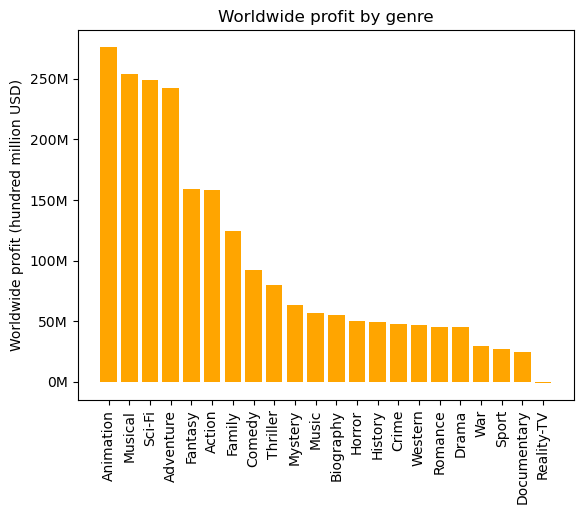

In [461]:
# plot on barcharts:
x = mean_profit_by_genre.index
y1 = mean_profit_by_genre['worldwide_profit']
# y2 = mean_profit_by_genre['worldwide_ROI']

fig, ax1 = plt.subplots()

# Bar chart
ax1.bar(x, y1, color='orange')
ax1.set_ylabel('Worldwide profit (hundred million USD)')
#create y-axis on the right:
# ax2 = ax1.twinx()
# Line chart
# ax2.plot(x, y2, marker='o', color='black') 
# ax2.set_ylabel('Worldwide ROI')
#format a-axis tick
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=90)
# ax1.set_xticklabels(x, rotation=90)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

ax1.set_title('Worldwide profit by genre');

In [156]:
#Top 5 genre by worldwide profit:
top4_mean_profit_by_genre= mean_profit_by_genre.head(4)
top4_mean_profit_by_genre.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,worldwide_ROI,production_budget,id,start_year,runtime_minutes
each_genre,,,,,,,,,,,,,,
Animation,"135,184,389.19","238,325,778.94","373,510,168.13","37,855,957.81","140,997,347.57","276,181,736.75",0.37,1.27,7.117647,2.64,"97,328,431.37",44.941176,2014.215686,94.53
Musical,"121,651,825.00","197,715,139.56","319,366,964.56","56,551,825.00","132,615,139.56","254,266,964.56",-0.03,0.96,7.666667,1.93,"65,100,000.00",36.000000,2012.777778,115.11
Sci-Fi,"125,058,209.60","217,879,589.57","342,937,799.17","31,237,537.96","124,058,917.93","249,117,127.53",0.54,1.07,6.664179,2.61,"93,820,671.64",49.798507,2014.358209,114.31
Adventure,"123,203,054.62","225,154,737.27","348,357,791.90","17,132,261.42","119,083,944.07","242,286,998.69",0.18,0.87,6.974504,2.06,"106,070,793.20",47.671388,2014.291785,111.15


In [157]:
#list of top 5 genre list by worldwide profit:
top_4_genre_list = list(top4_mean_profit_by_genre.index)
top_4_genre_list

['Animation', 'Musical', 'Sci-Fi', 'Adventure']

In [168]:
top_4_genre_df = tnmovie_basics.loc[tnmovie_basics['each_genre'].isin(top_4_genre_list)]
top_4_genre_df.head().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,movie,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,release_year,movie_year,worldwide_ROI,production_budget,movie_id,primary_title,original_title,id,release_date,start_year,runtime_minutes,genres,title_year,each_genre,main_genre,sub_genre1,sub_genre2
1,Pirates of the Caribbean: On Stranger Tides,"241,063,875.00","804,600,000.00","1,045,663,875.00","-169,536,125.00","394,000,000.00","635,063,875.00",-0.41,0.96,5,2011,Pirates of the Caribbean: On Stranger Tides2011,1.55,"410,600,000.00",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",2011,136.00,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,Action,Adventure,Fantasy
4,Dark Phoenix,"42,762,350.00","107,000,000.00","149,762,350.00","-307,237,650.00","-243,000,000.00","-200,237,650.00",-0.88,-0.69,6,2019,Dark Phoenix2019,-0.57,"350,000,000.00",tt6565702,Dark Phoenix,Dark Phoenix,3,"Jun 7, 2019",2019,113.00,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Adventure,Action,Adventure,Sci-Fi
5,Dark Phoenix,"42,762,350.00","107,000,000.00","149,762,350.00","-307,237,650.00","-243,000,000.00","-200,237,650.00",-0.88,-0.69,6,2019,Dark Phoenix2019,-0.57,"350,000,000.00",tt6565702,Dark Phoenix,Dark Phoenix,3,"Jun 7, 2019",2019,113.00,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Sci-Fi,Action,Adventure,Sci-Fi
7,Avengers: Age of Ultron,"459,005,868.00","944,008,095.00","1,403,013,963.00","128,405,868.00","613,408,095.00","1,072,413,963.00",0.39,1.86,5,2015,Avengers: Age of Ultron2015,3.24,"330,600,000.00",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,4,"May 1, 2015",2015,141.00,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure,Action,Adventure,Sci-Fi
8,Avengers: Age of Ultron,"459,005,868.00","944,008,095.00","1,403,013,963.00","128,405,868.00","613,408,095.00","1,072,413,963.00",0.39,1.86,5,2015,Avengers: Age of Ultron2015,3.24,"330,600,000.00",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,4,"May 1, 2015",2015,141.00,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi,Action,Adventure,Sci-Fi


In [169]:
top_4_genre_df.describe().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,worldwide_ROI,production_budget,id,start_year,runtime_minutes
count,598.00,598.00,598.00,598.00,598.00,598.00,598.00,598.00,598.000000,598.00,598.00,598.000000,598.000000,594.00
mean,"125,639,050.98","225,358,115.33","350,997,166.32","24,421,057.67","124,140,122.02","249,779,173.01",0.29,0.99,6.939799,2.28,"101,217,993.31",47.506689,2014.270903,109.10
std,"132,526,868.36","235,484,382.93","357,129,835.89","102,522,751.11","189,484,933.21","309,091,320.55",1.29,1.74,3.256698,2.75,"73,508,259.49",28.584515,2.678819,18.93
min,0.00,0.00,0.00,"-307,237,650.00","-243,000,000.00","-200,237,650.00",-1.00,-1.00,1.000000,-1.00,"70,000.00",1.000000,2010.000000,60.00
25%,"30,881,252.50","33,306,039.50","66,356,392.00","-24,903,049.25","-3,803,527.25","21,018,461.00",-0.50,-0.24,4.000000,0.43,"38,000,000.00",24.250000,2012.000000,95.00
50%,"83,295,507.00","155,055,544.00","245,526,487.00","-581,500.00","48,801,461.50","134,810,712.50",-0.05,0.62,7.000000,1.67,"90,000,000.00",46.000000,2014.000000,105.00
75%,"176,733,765.00","349,179,062.25","529,417,053.50","47,397,510.00","210,430,561.00","385,878,762.00",0.66,1.73,10.000000,3.25,"155,000,000.00",72.000000,2016.000000,122.00
max,"700,059,566.00","1,369,318,718.00","2,048,134,200.00","500,059,566.00","1,069,318,718.00","1,748,134,200.00",10.06,10.14,12.000000,18.68,"410,600,000.00",100.000000,2020.000000,169.00


In [170]:
top_world_revenue_list = list(top_4_genre_df['worldwide_gross'])
# world_revenue_list

In [172]:
#Create intervals of worldwide_gross:
interval = [0, 200000000, 500000000, 1000000000, 2000000000, float('inf')]
top_4_genre_df.loc[:, 'revenue_group']  = pd.cut(top_4_genre_df['worldwide_gross'], bins=intervals, labels=['<200M', '200M-500M', '500M-1B', '1B-2B','>2B'])

In [173]:
top_4_genre_df.head().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,movie,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,release_year,movie_year,worldwide_ROI,production_budget,movie_id,primary_title,original_title,id,release_date,start_year,runtime_minutes,genres,title_year,each_genre,main_genre,sub_genre1,sub_genre2,revenue_group
1,Pirates of the Caribbean: On Stranger Tides,"241,063,875.00","804,600,000.00","1,045,663,875.00","-169,536,125.00","394,000,000.00","635,063,875.00",-0.41,0.96,5,2011,Pirates of the Caribbean: On Stranger Tides2011,1.55,"410,600,000.00",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",2011,136.00,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,Action,Adventure,Fantasy,1B-2B
4,Dark Phoenix,"42,762,350.00","107,000,000.00","149,762,350.00","-307,237,650.00","-243,000,000.00","-200,237,650.00",-0.88,-0.69,6,2019,Dark Phoenix2019,-0.57,"350,000,000.00",tt6565702,Dark Phoenix,Dark Phoenix,3,"Jun 7, 2019",2019,113.00,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Adventure,Action,Adventure,Sci-Fi,<200M
5,Dark Phoenix,"42,762,350.00","107,000,000.00","149,762,350.00","-307,237,650.00","-243,000,000.00","-200,237,650.00",-0.88,-0.69,6,2019,Dark Phoenix2019,-0.57,"350,000,000.00",tt6565702,Dark Phoenix,Dark Phoenix,3,"Jun 7, 2019",2019,113.00,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Sci-Fi,Action,Adventure,Sci-Fi,<200M
7,Avengers: Age of Ultron,"459,005,868.00","944,008,095.00","1,403,013,963.00","128,405,868.00","613,408,095.00","1,072,413,963.00",0.39,1.86,5,2015,Avengers: Age of Ultron2015,3.24,"330,600,000.00",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,4,"May 1, 2015",2015,141.00,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure,Action,Adventure,Sci-Fi,1B-2B
8,Avengers: Age of Ultron,"459,005,868.00","944,008,095.00","1,403,013,963.00","128,405,868.00","613,408,095.00","1,072,413,963.00",0.39,1.86,5,2015,Avengers: Age of Ultron2015,3.24,"330,600,000.00",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,4,"May 1, 2015",2015,141.00,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi,Action,Adventure,Sci-Fi,1B-2B


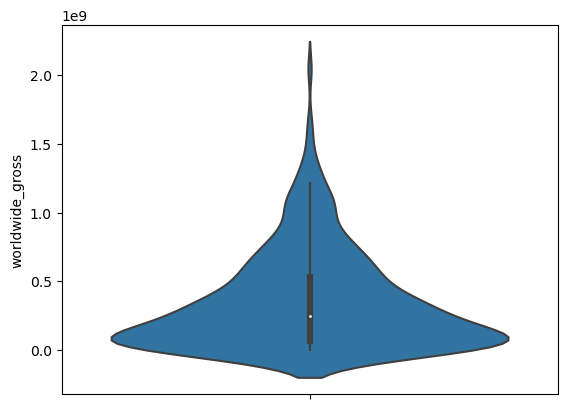

In [174]:
sns.violinplot( y = 'worldwide_gross', data = top_4_genre_df)
plt.show()

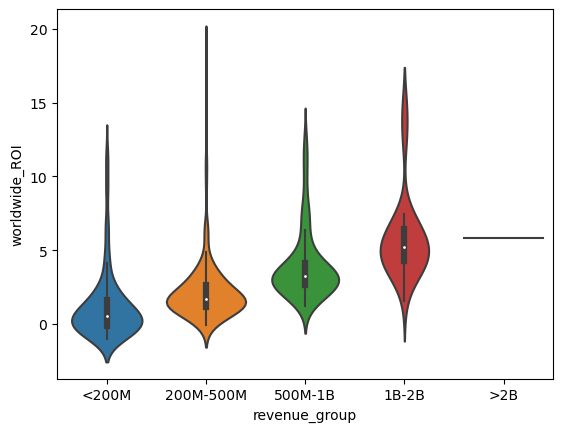

In [175]:

sns.violinplot(x = 'revenue_group', y = 'worldwide_ROI', data = top_4_genre_df)
plt.show()

In [224]:
#Create intervals of worldwide_ROI:
interval2 = [0,20000000, 50000000, 100000000,200000000,300000000,400000000, float('inf')]
top_4_genre_df.loc[:, 'budget_group']  = pd.cut(top_4_genre_df.loc[:,'production_budget'], bins=interval2, labels=['<20M', '20M-50M', '50M-100M','100M-200M', '200M-300M','300M-400M','>400M'])

In [188]:
top_4_genre_df.head()

,movie,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,...,start_year,runtime_minutes,genres,title_year,each_genre,main_genre,sub_genre1,sub_genre2,revenue_group,budget_group
1,Pirates of the Caribbean: On Stranger Tides,241063875.0,804600000.0,1.045664e+09,-169536125.0,394000000.0,6.350639e+08,-0.412899,0.959571,5,...,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,Action,Adventure,Fantasy,1B-2B,>400M
4,Dark Phoenix,42762350.0,107000000.0,1.497624e+08,-307237650.0,-243000000.0,-2.002376e+08,-0.877822,-0.694286,6,...,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Adventure,Action,Adventure,Sci-Fi,<200M,300M-400M
5,Dark Phoenix,42762350.0,107000000.0,1.497624e+08,-307237650.0,-243000000.0,-2.002376e+08,-0.877822,-0.694286,6,...,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Sci-Fi,Action,Adventure,Sci-Fi,<200M,300M-400M
7,Avengers: Age of Ultron,459005868.0,944008095.0,1.403014e+09,128405868.0,613408095.0,1.072414e+09,0.388403,1.855439,5,...,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure,Action,Adventure,Sci-Fi,1B-2B,300M-400M
8,Avengers: Age of Ultron,459005868.0,944008095.0,1.403014e+09,128405868.0,613408095.0,1.072414e+09,0.388403,1.855439,5,...,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi,Action,Adventure,Sci-Fi,1B-2B,300M-400M


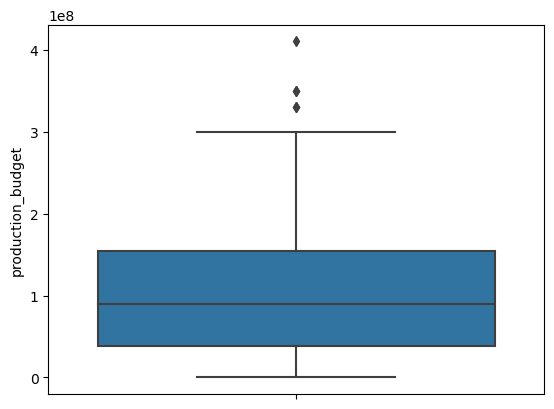

In [225]:
sns.boxplot( y = 'production_budget', 
            data = top_4_genre_df, orient = 'v')
plt.show()

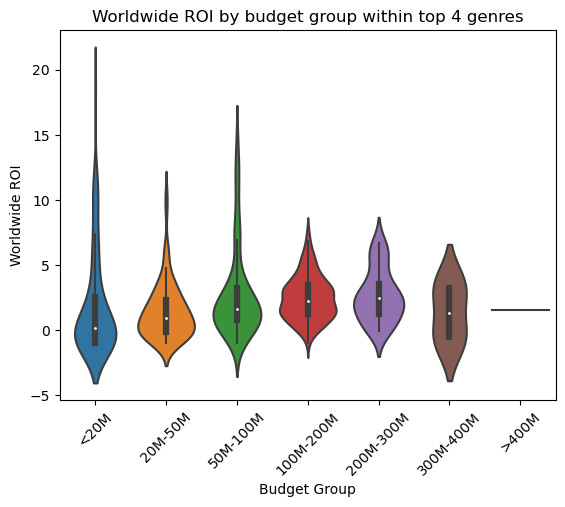

In [239]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = top_4_genre_df)
plt.xticks(rotation=45)
plt.title('Worldwide ROI by budget group within top 4 genres')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

In [240]:
def another_fun_estimator(input_series):

    chisquared_centered = (input_series - input_series.mean())**2
    another_fun_est = np.log(chisquared_centered.sum())
    return another_fun_est

/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


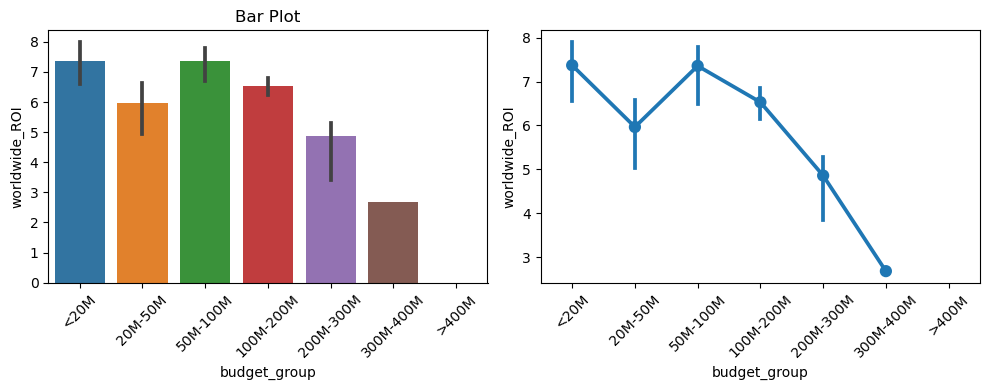

In [241]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = 'budget_group', y = 'worldwide_ROI', data = top_4_genre_df, 
            errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  
ax[0].set_title('Bar Plot')

sns.pointplot(x = 'budget_group', y = 'worldwide_ROI', data = top_4_genre_df,
             errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[1])

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45) 
plt.tight_layout()
plt.show()

In [452]:
animation_top_4_genre_df = top_4_genre_df[top_4_genre_df['each_genre']=="Animation"]
animation_top_4_genre_df

,movie,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,...,start_year,runtime_minutes,genres,title_year,each_genre,main_genre,sub_genre1,sub_genre2,revenue_group,budget_group
30,Tangled,200821936.0,385655304.0,5.864772e+08,-59178064.0,125655304.0,3.264772e+08,-0.227608,0.483290,11,...,2010,100.0,"Adventure,Animation,Comedy",Tangled2010,Animation,Adventure,Animation,Comedy,500M-1B,200M-300M
83,Incredibles 2,608581744.0,633938967.0,1.242521e+09,408581744.0,433938967.0,1.042521e+09,2.042909,2.169695,6,...,2018,118.0,"Action,Adventure,Animation",Incredibles 22018,Animation,Action,Adventure,Animation,1B-2B,100M-200M
88,Finding Dory,486295561.0,534919632.0,1.021215e+09,286295561.0,334919632.0,8.212152e+08,1.431478,1.674598,6,...,2016,97.0,"Adventure,Animation,Comedy",Finding Dory2016,Animation,Adventure,Animation,Comedy,1B-2B,100M-200M
91,Toy Story 3,415004880.0,653874642.0,1.068880e+09,215004880.0,453874642.0,8.688795e+08,1.075024,2.269373,6,...,2010,103.0,"Adventure,Animation,Comedy",Toy Story 32010,Animation,Adventure,Animation,Comedy,1B-2B,100M-200M
105,Monsters University,268488329.0,475100000.0,7.435883e+08,68488329.0,275100000.0,5.435883e+08,0.342442,1.375500,6,...,2013,104.0,"Adventure,Animation,Comedy",Monsters University2013,Animation,Adventure,Animation,Comedy,500M-1B,100M-200M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,Khumba,0.0,20898221.0,2.089822e+07,-15000000.0,5898221.0,5.898221e+06,-1.000000,0.393215,12,...,2013,85.0,"Adventure,Animation,Family",Khumba2013,Animation,Adventure,Animation,Family,<200M,<20M
3025,Anomalisa,3759286.0,1946882.0,5.706168e+06,-4240714.0,-6053118.0,-2.293832e+06,-0.530089,-0.756640,12,...,2015,90.0,"Animation,Comedy,Drama",Anomalisa2015,Animation,Animation,Comedy,Drama,<200M,<20M
3275,Henry & Me,0.0,0.0,0.000000e+00,-5000000.0,-5000000.0,-5.000000e+06,-1.000000,-1.000000,8,...,2014,67.0,"Animation,Family",Henry & Me2014,Animation,Animation,Family,None,NaN,<20M
3461,Underdogs,35017.0,1357632.0,1.392649e+06,-2464983.0,-1142368.0,-1.107351e+06,-0.985993,-0.456947,8,...,2013,106.0,"Adventure,Animation,Family",Underdogs2013,Animation,Adventure,Animation,Family,<200M,<20M


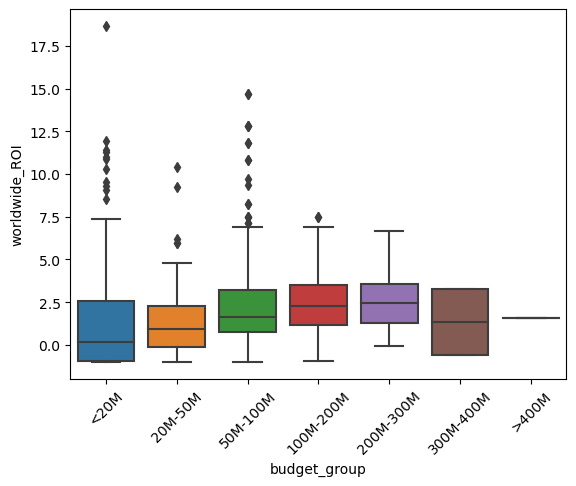

In [453]:
sns.boxplot(x = 'budget_group', y = 'worldwide_ROI' , 
            data = top_4_genre_df, orient = 'v')
plt.xticks(rotation=45)
plt.show()

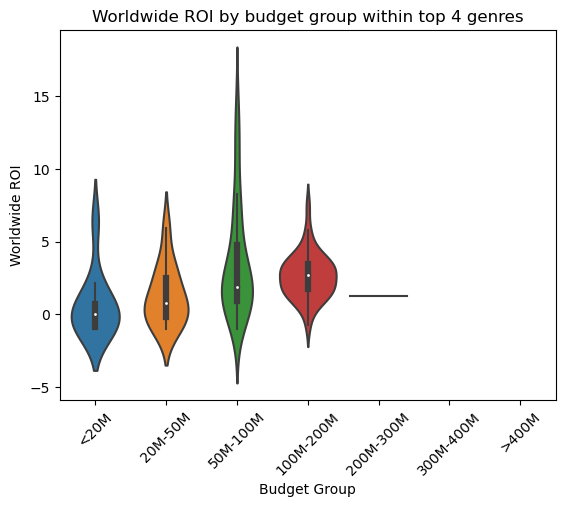

In [245]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = animation_top_4_genre_df)
plt.xticks(rotation=45)
plt.title('Worldwide ROI by budget group within top 4 genres')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())
/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())


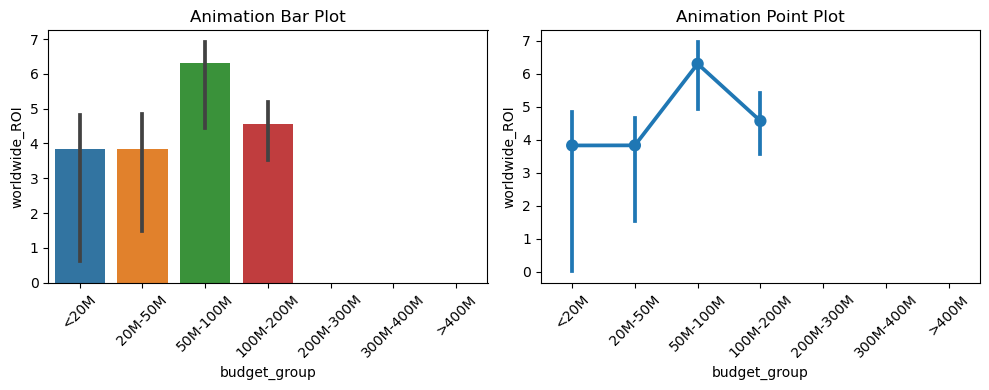

In [454]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = 'budget_group', y = 'worldwide_ROI', data = animation_top_4_genre_df, 
            errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  
ax[0].set_title('Animation Bar Plot')

sns.pointplot(x = 'budget_group', y = 'worldwide_ROI', data = animation_top_4_genre_df,
             errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[1])

ax[1].set_title('Animation Point Plot')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45) 
plt.tight_layout()
plt.show()

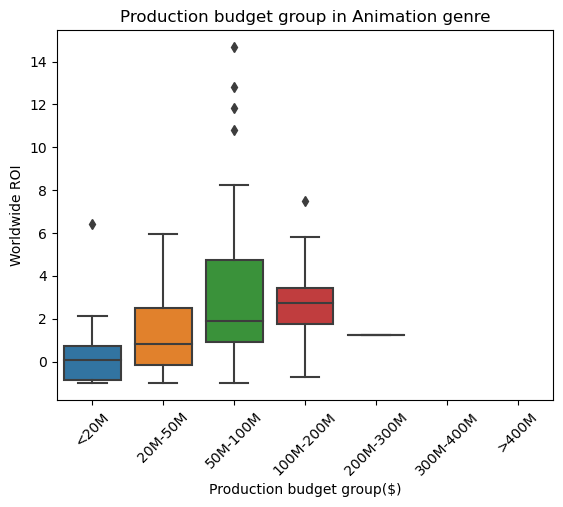

In [460]:
#Chec production budget group vs worldwide_ROI
sns.boxplot(x = 'budget_group', y = 'worldwide_ROI' , 
            data = animation_top_4_genre_df, orient = 'v')
plt.xticks(rotation=45)
plt.xlabel('Production budget group($)')
plt.ylabel('Worldwide ROI')
plt.title('Production budget group in Animation genre')
plt.show()

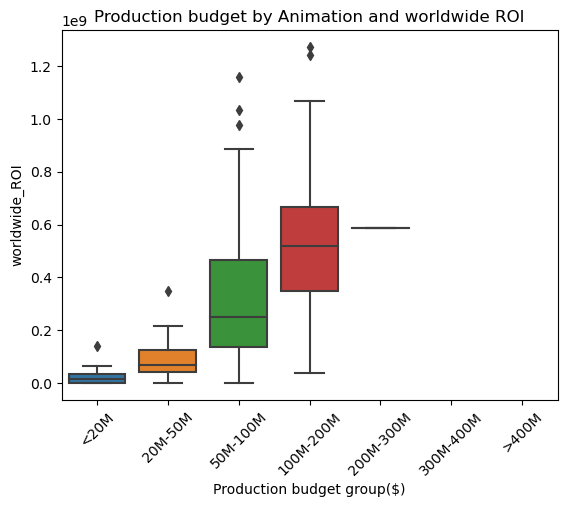

In [457]:
#Check production budget vs worldwide gross
sns.boxplot(x = 'budget_group', y = 'worldwide_gross' , 
            data = animation_top_4_genre_df, orient = 'v')
plt.xticks(rotation=45)
plt.xlabel('Production budget group($)')
plt.ylabel('worldwide_ROI')
plt.title('Production budget by Animation and worldwide ROI')
plt.show()

In [248]:
musical_top_4_genre_df = top_4_genre_df[top_4_genre_df['each_genre']=="Musical"]
musical_top_4_genre_df

,movie,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,...,start_year,runtime_minutes,genres,title_year,each_genre,main_genre,sub_genre1,sub_genre2,revenue_group,budget_group
100,Alice in Wonderland,334191110.0,691300000.0,1.025491e+09,134191110.0,491300000.0,8.254911e+08,0.670956,2.456500,3,...,2010,99.0,"Fantasy,Musical",Alice in Wonderland2010,Musical,Fantasy,Musical,None,1B-2B,100M-200M
278,Beauty and the Beast,504014165.0,755185541.0,1.259200e+09,344014165.0,595185541.0,1.099200e+09,2.150089,3.719910,3,...,2017,129.0,"Family,Fantasy,Musical",Beauty and the Beast2017,Musical,Family,Fantasy,Musical,1B-2B,100M-200M
767,The Greatest Showman,174340174.0,212325376.0,3.866656e+08,90340174.0,128325376.0,3.026656e+08,1.075478,1.527683,12,...,2017,105.0,"Biography,Drama,Musical",The Greatest Showman2017,Musical,Biography,Drama,Musical,200M-500M,50M-100M
889,Rock of Ages,38518613.0,22513319.0,6.103193e+07,-31481387.0,-47486681.0,-8.968068e+06,-0.449734,-0.678381,6,...,2012,123.0,"Comedy,Drama,Musical",Rock of Ages2012,Musical,Comedy,Drama,Musical,<200M,50M-100M
1111,Burlesque,39440655.0,51112020.0,9.055268e+07,-15559345.0,-3887980.0,3.555268e+07,-0.282897,-0.070691,11,...,2010,119.0,"Drama,Music,Musical",Burlesque2010,Musical,Drama,Music,Musical,<200M,50M-100M
2995,Yeh Jawaani Hai Deewani,3827466.0,47000000.0,5.082747e+07,-4472534.0,38700000.0,4.252747e+07,-0.538860,4.662651,5,...,2013,160.0,"Comedy,Drama,Musical",Yeh Jawaani Hai Deewani2013,Musical,Comedy,Drama,Musical,<200M,<20M
3149,Standing Ovation,531806.0,0.0,5.318060e+05,-5068194.0,-5600000.0,-5.068194e+06,-0.905035,-1.000000,7,...,2010,105.0,Musical,Standing Ovation2010,Musical,Musical,None,None,<200M,<20M
3522,The Ghastly Love of Johnny X,2436.0,0.0,2.436000e+03,-1997564.0,-2000000.0,-1.997564e+06,-0.998782,-1.000000,10,...,2012,106.0,"Comedy,Fantasy,Musical",The Ghastly Love of Johnny X2012,Musical,Comedy,Fantasy,Musical,<200M,<20M
3688,Bang Bang Baby,0.0,0.0,0.000000e+00,-1000000.0,-1000000.0,-1.000000e+06,-1.000000,-1.000000,12,...,2014,90.0,"Drama,Fantasy,Musical",Bang Bang Baby2014,Musical,Drama,Fantasy,Musical,NaN,<20M


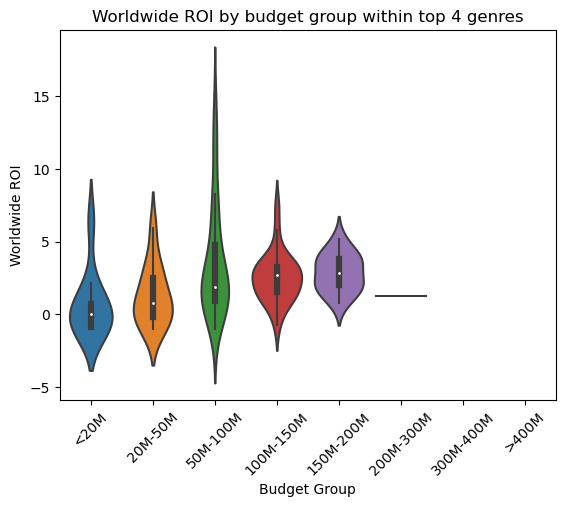

In [201]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = animation_top_4_genre_df)
plt.xticks(rotation=45)
plt.title('Worldwide ROI by budget group within top 4 genres')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


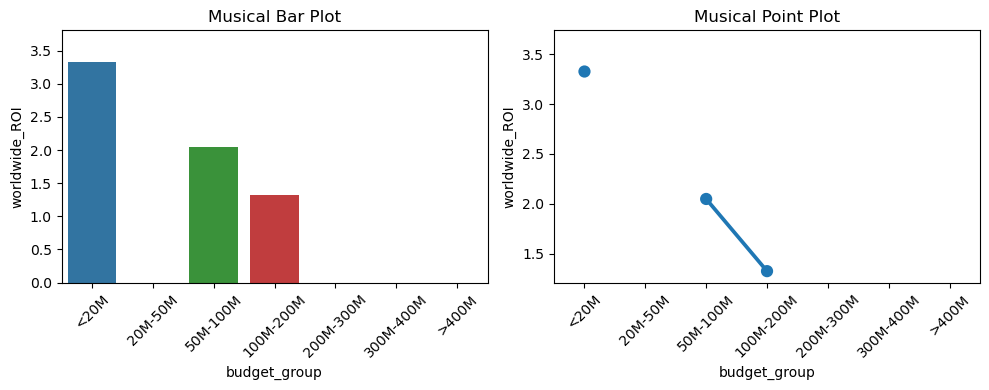

In [249]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = 'budget_group', y = 'worldwide_ROI', data = musical_top_4_genre_df, 
            errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  
ax[0].set_title('Musical Bar Plot')

sns.pointplot(x = 'budget_group', y = 'worldwide_ROI', data = musical_top_4_genre_df,
             errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[1])

ax[1].set_title('Musical Point Plot')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45) 
plt.tight_layout()
plt.show()

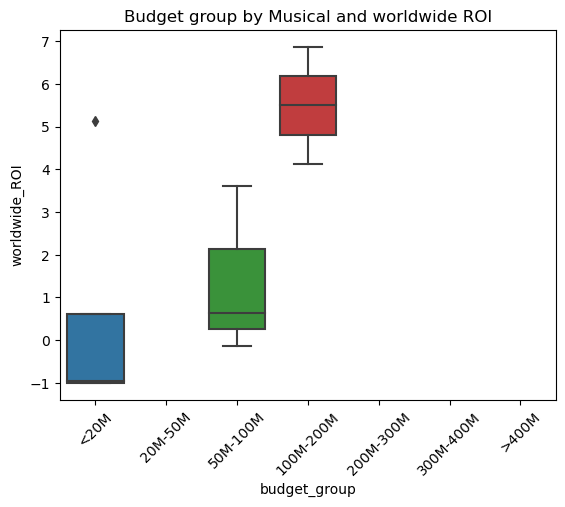

In [261]:
sns.boxplot(x = 'budget_group', y = 'worldwide_ROI' , 
            data = musical_top_4_genre_df, orient = 'v')
plt.xticks(rotation=45)
plt.title('Budget group by Musical and worldwide ROI')
plt.show()


In [251]:
scifi_top_4_genre_df = top_4_genre_df[top_4_genre_df['each_genre']=="Sci-Fi"]
scifi_top_4_genre_df

,movie,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,...,start_year,runtime_minutes,genres,title_year,each_genre,main_genre,sub_genre1,sub_genre2,revenue_group,budget_group
5,Dark Phoenix,42762350.0,1.070000e+08,1.497624e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,6,...,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Sci-Fi,Action,Adventure,Sci-Fi,<200M,300M-400M
8,Avengers: Age of Ultron,459005868.0,9.440081e+08,1.403014e+09,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,5,...,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi,Action,Adventure,Sci-Fi,1B-2B,300M-400M
11,Avengers: Infinity War,678815482.0,1.369319e+09,2.048134e+09,378815482.0,1.069319e+09,1.748134e+09,1.262718,3.564396,4,...,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Sci-Fi,Action,Adventure,Sci-Fi,>2B,200M-300M
28,John Carter,73058679.0,2.097194e+08,2.827781e+08,-201941321.0,-6.528058e+07,7.778100e+06,-0.734332,-0.237384,3,...,2012,132.0,"Action,Adventure,Sci-Fi",John Carter2012,Sci-Fi,Action,Adventure,Sci-Fi,200M-500M,200M-300M
34,Captain America: Civil War,408084349.0,7.319851e+08,1.140069e+09,158084349.0,4.819851e+08,8.900694e+08,0.632337,1.927940,5,...,2016,147.0,"Action,Adventure,Sci-Fi",Captain America: Civil War2016,Sci-Fi,Action,Adventure,Sci-Fi,1B-2B,200M-300M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,Rotor DR1,0.0,0.000000e+00,0.000000e+00,-350000.0,-3.500000e+05,-3.500000e+05,-1.000000,-1.000000,10,...,2015,98.0,"Family,Sci-Fi",Rotor DR12015,Sci-Fi,Family,Sci-Fi,None,NaN,<20M
3815,H.,0.0,0.000000e+00,0.000000e+00,-200000.0,-2.000000e+05,-2.000000e+05,-1.000000,-1.000000,12,...,2014,93.0,"Drama,Sci-Fi,Thriller",H.2014,Sci-Fi,Drama,Sci-Fi,Thriller,NaN,<20M
3826,Another Earth,1321194.0,7.815850e+05,2.102779e+06,1146194.0,6.065850e+05,1.927779e+06,6.549680,3.466200,7,...,2011,92.0,"Drama,Romance,Sci-Fi",Another Earth2011,Sci-Fi,Drama,Romance,Sci-Fi,<200M,<20M
3847,Queen Crab,0.0,0.000000e+00,0.000000e+00,-75000.0,-7.500000e+04,-7.500000e+04,-1.000000,-1.000000,9,...,2015,80.0,"Action,Sci-Fi,Thriller",Queen Crab2015,Sci-Fi,Action,Sci-Fi,Thriller,NaN,<20M


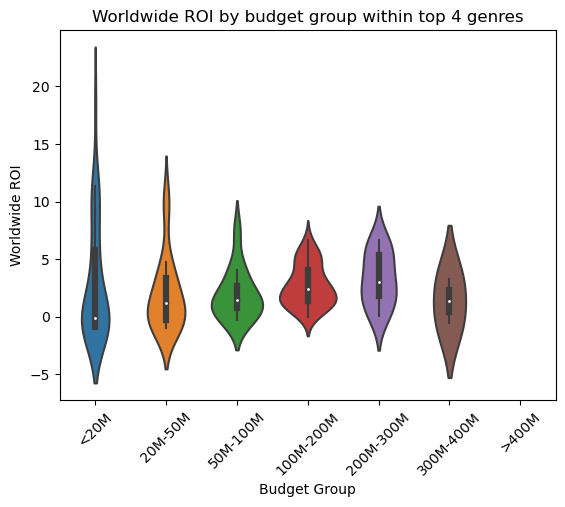

In [252]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = scifi_top_4_genre_df)
plt.xticks(rotation=45)
plt.title('Worldwide ROI by budget group within top 4 genres')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


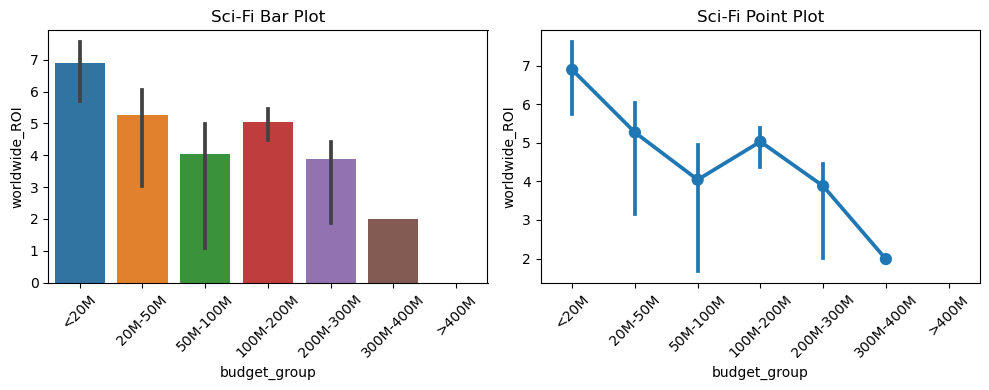

In [253]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = 'budget_group', y = 'worldwide_ROI', data = scifi_top_4_genre_df, 
            errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  
ax[0].set_title('Sci-Fi Bar Plot')

sns.pointplot(x = 'budget_group', y = 'worldwide_ROI', data = scifi_top_4_genre_df,
             errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[1])

ax[1].set_title('Sci-Fi Point Plot')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45) 
plt.tight_layout()
plt.show()

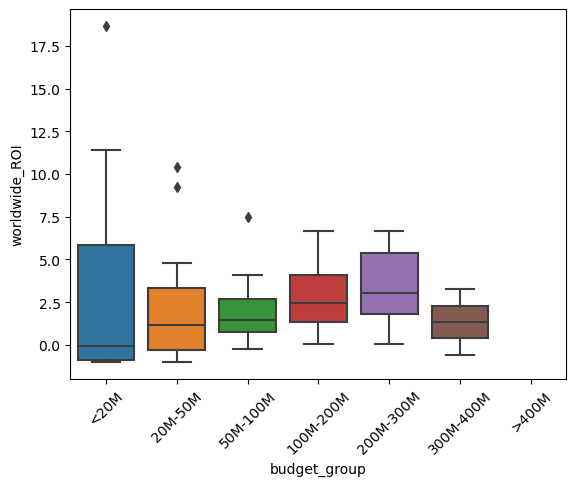

In [255]:
sns.boxplot(x = 'budget_group', y = 'worldwide_ROI' , 
            data = scifi_top_4_genre_df, orient = 'v')
plt.xticks(rotation=45)
plt.show()

In [256]:
adventure_top_4_genre_df = top_4_genre_df[top_4_genre_df['each_genre']=="Adventure"]
adventure_top_4_genre_df

,movie,domestic_gross,international_gross,worldwide_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,release_month,...,start_year,runtime_minutes,genres,title_year,each_genre,main_genre,sub_genre1,sub_genre2,revenue_group,budget_group
1,Pirates of the Caribbean: On Stranger Tides,241063875.0,8.046000e+08,1.045664e+09,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,5,...,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,Action,Adventure,Fantasy,1B-2B,>400M
4,Dark Phoenix,42762350.0,1.070000e+08,1.497624e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,6,...,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Adventure,Action,Adventure,Sci-Fi,<200M,300M-400M
7,Avengers: Age of Ultron,459005868.0,9.440081e+08,1.403014e+09,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,5,...,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure,Action,Adventure,Sci-Fi,1B-2B,300M-400M
10,Avengers: Infinity War,678815482.0,1.369319e+09,2.048134e+09,378815482.0,1.069319e+09,1.748134e+09,1.262718,3.564396,4,...,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Adventure,Action,Adventure,Sci-Fi,>2B,200M-300M
13,Justice League,229024295.0,4.269209e+08,6.559452e+08,-70975705.0,1.269209e+08,3.559452e+08,-0.236586,0.423070,11,...,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,Adventure,Action,Adventure,Fantasy,500M-1B,200M-300M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,Independence Daysaster,0.0,0.000000e+00,0.000000e+00,-1800000.0,-1.800000e+06,-1.800000e+06,-1.000000,-1.000000,12,...,2013,90.0,"Action,Adventure,Sci-Fi",Independence Daysaster2013,Adventure,Action,Adventure,Sci-Fi,NaN,<20M
3670,Karachi se Lahore,0.0,1.772100e+04,1.772100e+04,-1000000.0,-9.822790e+05,-9.822790e+05,-1.000000,-0.982279,12,...,2015,143.0,"Adventure,Comedy,Family",Karachi se Lahore2015,Adventure,Adventure,Comedy,Family,<200M,<20M
3716,Destiny,0.0,4.500000e+02,4.500000e+02,-750000.0,-7.495500e+05,-7.495500e+05,-1.000000,-0.999400,12,...,2014,NaN,"Adventure,Comedy,Family",Destiny2014,Adventure,Adventure,Comedy,Family,<200M,<20M
3786,Death Calls,0.0,0.000000e+00,0.000000e+00,-290000.0,-2.900000e+05,-2.900000e+05,-1.000000,-1.000000,12,...,2010,90.0,"Action,Adventure,Mystery",Death Calls2010,Adventure,Action,Adventure,Mystery,NaN,<20M


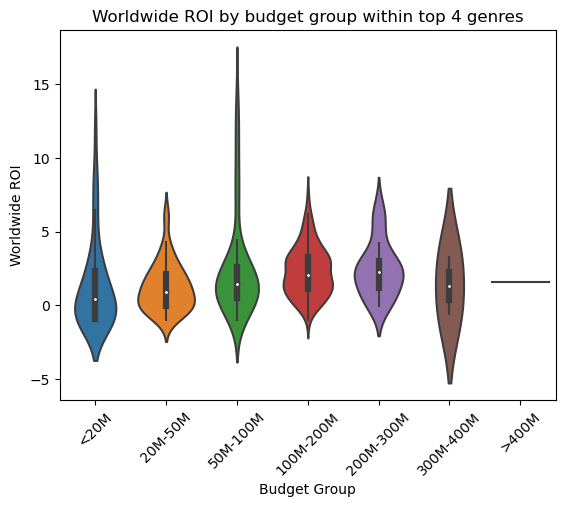

In [257]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = adventure_top_4_genre_df)
plt.xticks(rotation=45)
plt.title('Worldwide ROI by budget group within top 4 genres')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_8144/771611934.py:4: RuntimeWarning: divide by zero encountered in log
  another_fun_est = np.log(chisquared_centered.sum())
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


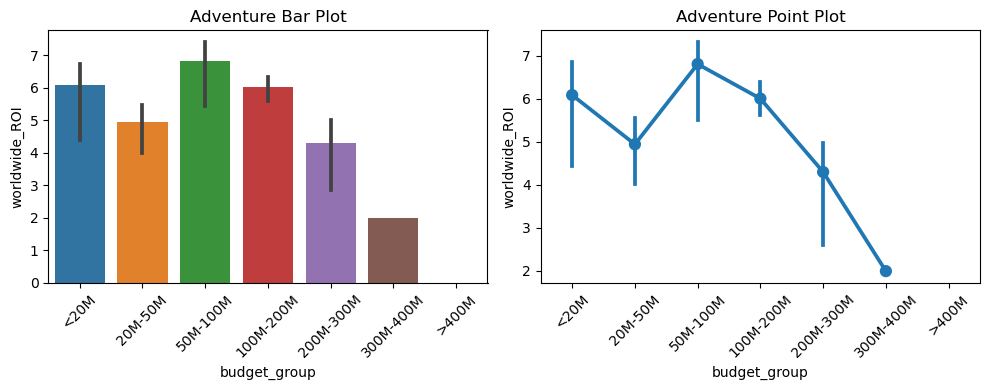

In [258]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = 'budget_group', y = 'worldwide_ROI', data = adventure_top_4_genre_df, 
            errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  
ax[0].set_title('Adventure Bar Plot')

sns.pointplot(x = 'budget_group', y = 'worldwide_ROI', data = adventure_top_4_genre_df,
             errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[1])

ax[1].set_title('Adventure Point Plot')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45) 
plt.tight_layout()
plt.show()

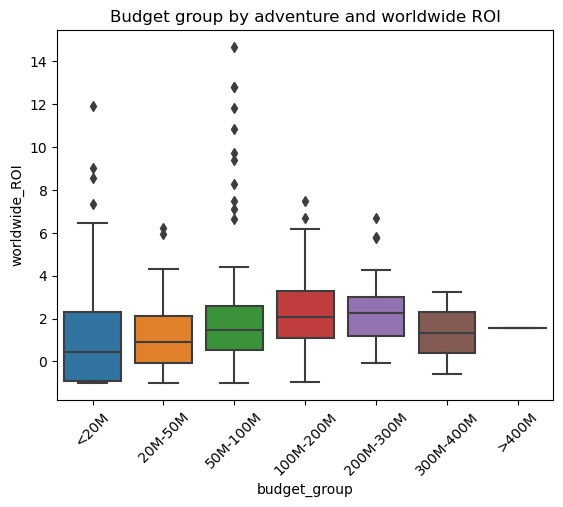

In [260]:
sns.boxplot(x = 'budget_group', y = 'worldwide_ROI' , 
            data = adventure_top_4_genre_df, orient = 'v')
plt.xticks(rotation=45)
plt.title('Budget group by adventure and worldwide ROI')
plt.show()

# Popularity

In [368]:
merge_tn_tmdb_movie = pd.merge(tn_movie,tmdb_movie, left_on = "movie_year", right_on = 'title_year', how = 'inner')
merge_tn_tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  1758 non-null   int64  
 1   release_date_x        1758 non-null   object 
 2   movie                 1758 non-null   object 
 3   production_budget     1758 non-null   float64
 4   domestic_gross        1758 non-null   float64
 5   worldwide_gross       1758 non-null   float64
 6   release_month_x       1758 non-null   int64  
 7   release_year_x        1758 non-null   object 
 8   movie_year            1758 non-null   object 
 9   international_gross   1758 non-null   float64
 10  domestic_profit       1758 non-null   float64
 11  international_profit  1758 non-null   float64
 12  worldwide_profit      1758 non-null   float64
 13  domestic_ROI          1758 non-null   float64
 14  international_ROI     1758 non-null   float64
 15  worldwide_ROI        

In [371]:
merge_tn_tmdb_movie_basics = pd.merge(merge_tn_tmdb_movie,movie_basics_df, left_on = "movie_year",right_on = 'title_year', how = 'inner')

In [372]:
merge_tn_tmdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  1548 non-null   int64  
 1   release_date_x        1548 non-null   object 
 2   movie                 1548 non-null   object 
 3   production_budget     1548 non-null   float64
 4   domestic_gross        1548 non-null   float64
 5   worldwide_gross       1548 non-null   float64
 6   release_month_x       1548 non-null   int64  
 7   release_year_x        1548 non-null   object 
 8   movie_year            1548 non-null   object 
 9   international_gross   1548 non-null   float64
 10  domestic_profit       1548 non-null   float64
 11  international_profit  1548 non-null   float64
 12  worldwide_profit      1548 non-null   float64
 13  domestic_ROI          1548 non-null   float64
 14  international_ROI     1548 non-null   float64
 15  worldwide_ROI        

In [374]:
#Sort string in "genres" columns in anphabet order:
merge_tn_tmdb_movie_basics.loc[:, 'genres'] = merge_tn_tmdb_movie_basics['genres'].apply(lambda x: ', '.join(sorted(x.split(', '))) if x is not None else '')

# merge_tn_tmdb_movie_basics.info()

In [375]:
#Copy "genres" column and create a new column called "each_genre"
merge_tn_tmdb_movie_basics.loc[:, 'each_genre'] = merge_tn_tmdb_movie_basics['genres'].copy()
merge_tn_tmdb_movie_basics.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,release_year_y,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,"Action,Adventure,Fantasy"
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,"Action,Adventure,Sci-Fi"
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,2018,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,"Action,Adventure,Sci-Fi"
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,2017,Justice League2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,"Action,Adventure,Fantasy"
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,2017,Justice League2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,"Action,Adventure,Fantasy"


In [376]:
merge_tn_tmdb_movie_basics.columns

Index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_month_x',
       'release_year_x', 'movie_year', 'international_gross',
       'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI', 'Unnamed: 0',
       'genre_ids', 'id_y', 'original_language', 'original_title_x',
       'popularity', 'release_date_y', 'title', 'vote_average', 'vote_count',
       'release_month_y', 'release_year_y', 'title_year_x', 'movie_id',
       'primary_title', 'original_title_y', 'start_year', 'runtime_minutes',
       'genres', 'title_year_y', 'each_genre'],
      dtype='object')

In [404]:
merge_tn_tmdb_movie_basics.describe()

,id_x,production_budget,domestic_gross,worldwide_gross,release_month_x,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,Unnamed: 0,id_y,popularity,vote_average,vote_count,release_month_y,start_year,runtime_minutes
count,1548.000000,1.548000e+03,1.548000e+03,1.548000e+03,1548.000000,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1533.000000
mean,50.669897,4.684731e+07,6.017313e+07,1.509163e+08,7.523256,9.074320e+07,1.332583e+07,4.389590e+07,1.040690e+08,0.917423,0.933129,2.850551,11586.722868,203801.879845,12.980091,6.316150,2231.777132,7.347545,2013.910853,107.626875
std,28.827870,5.672644e+07,8.717855e+07,2.400912e+08,3.384837,1.602817e+08,6.124943e+07,1.199645e+08,1.981881e+08,6.504665,5.678873,11.945482,7615.947470,136299.606803,8.143378,0.939452,2933.760881,3.399781,2.476482,18.584761
min,1.000000,2.500000e+04,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,-2.019413e+08,-1.318430e+08,-1.104502e+08,-1.000000,-1.000000,-1.000000,1.000000,189.000000,0.600000,0.800000,1.000000,1.000000,2010.000000,4.000000
25%,26.000000,1.000000e+07,5.342828e+06,1.086452e+07,5.000000,2.671338e+06,-1.115444e+07,-9.181643e+06,-4.985015e+05,-0.657904,-0.788218,-0.148054,5233.500000,70952.750000,8.258750,5.800000,328.000000,4.000000,2012.000000,95.000000
50%,51.000000,2.500000e+07,3.097192e+07,5.876986e+07,8.000000,2.389475e+07,-7.250000e+04,-6.144500e+04,2.742735e+07,-0.033007,-0.031360,1.233773,11165.500000,201846.000000,11.380500,6.300000,1105.000000,8.000000,2014.000000,106.000000
75%,76.000000,6.000000e+07,7.268861e+07,1.706137e+08,10.000000,9.788725e+07,2.564591e+07,3.878890e+07,1.166736e+08,1.038293,1.204248,3.088817,17571.250000,323372.750000,16.018750,6.900000,2879.250000,10.000000,2016.000000,118.000000
max,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,12.000000,1.369319e+09,5.000596e+08,1.069319e+09,1.748134e+09,226.644100,187.920640,415.564740,24815.000000,532908.000000,80.773000,10.000000,22186.000000,12.000000,2018.000000,180.000000


In [377]:
#Split "each_genre" row into multiple rows:
split_merge_tn_tmdb_movie_basics = merge_tn_tmdb_movie_basics.set_index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_month_x',
       'release_year_x', 'movie_year', 'international_gross',
       'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI', 'Unnamed: 0',
       'genre_ids', 'id_y', 'original_language', 'original_title_x',
       'popularity', 'release_date_y', 'title', 'vote_average', 'vote_count',
       'release_month_y', 'release_year_y', 'title_year_x', 'movie_id',
       'primary_title', 'original_title_y', 'start_year', 'runtime_minutes',
       'genres', 'title_year_y']).apply(lambda x: x.str.split(',').explode()).reset_index()
split_merge_tn_tmdb_movie_basics.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,release_year_y,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Action
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Fantasy
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,944008095.0,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Action
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,944008095.0,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure


In [381]:
top4_split_merge_tn_tmdb_movie_basics = split_merge_tn_tmdb_movie_basics[split_merge_tn_tmdb_movie_basics['each_genre'].isin(top_4_genre_list)]

In [384]:
top4_split_merge_tn_tmdb_movie_basics.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,release_year_y,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure
5,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi
7,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,2018,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Adventure
8,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,2018,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Sci-Fi


In [387]:
top4_split_merge_tn_tmdb_movie_basics['each_genre'].value_counts()

each_genre
Adventure    358
Sci-Fi       137
Animation    104
Musical        8
Name: count, dtype: int64

In [415]:
top4_split_merge_tn_tmdb_movie_basics.columns

Index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_month_x',
       'release_year_x', 'movie_year', 'international_gross',
       'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI', 'Unnamed: 0',
       'genre_ids', 'id_y', 'original_language', 'original_title_x',
       'popularity', 'release_date_y', 'title', 'vote_average', 'vote_count',
       'release_month_y', 'release_year_y', 'title_year_x', 'movie_id',
       'primary_title', 'original_title_y', 'start_year', 'runtime_minutes',
       'genres', 'title_year_y', 'each_genre', 'popularity_group'],
      dtype='object')

In [424]:
#Create intervals of worldwide_gross:
interval3 = [0,10, 20, 30, 40, float('inf')]
top4_split_merge_tn_tmdb_movie_basics.loc[:, 'popularity_group']  = pd.cut(top4_split_merge_tn_tmdb_movie_basics['popularity'], bins=interval3, labels=['<10','10-20', '20-30', '30-40','>40'])

In [425]:
top4_split_merge_tn_tmdb_movie_basics.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre,popularity_group
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,30-40
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure,>40
5,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi,>40
7,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Adventure,>40
8,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Sci-Fi,>40


# Popularity group vs ROI

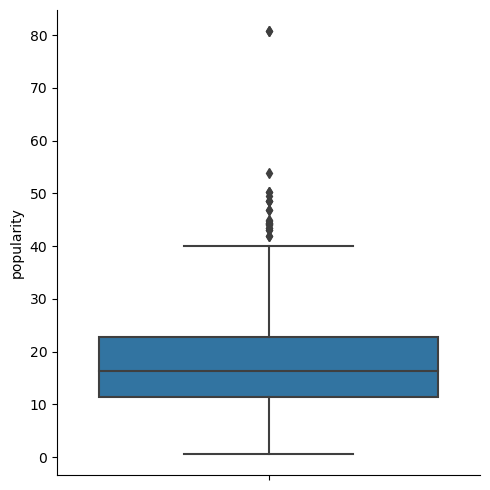

In [428]:
sns.catplot( y = 'popularity', kind = 'box', data = top4_split_merge_tn_tmdb_movie_basics)
plt.show()

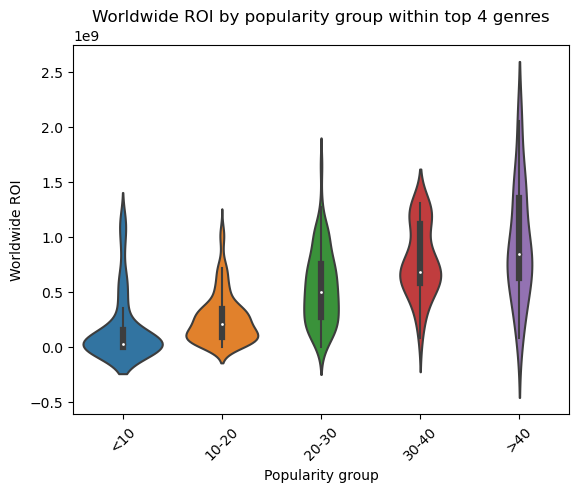

In [433]:
sns.violinplot(x = 'popularity_group', y = 'worldwide_gross', data = top4_split_merge_tn_tmdb_movie_basics)
plt.xticks(rotation=45)
plt.title('Worldwide ROI by popularity group within top 4 genres')
plt.xlabel('Popularity group')
plt.ylabel('Worldwide ROI')
plt.show()

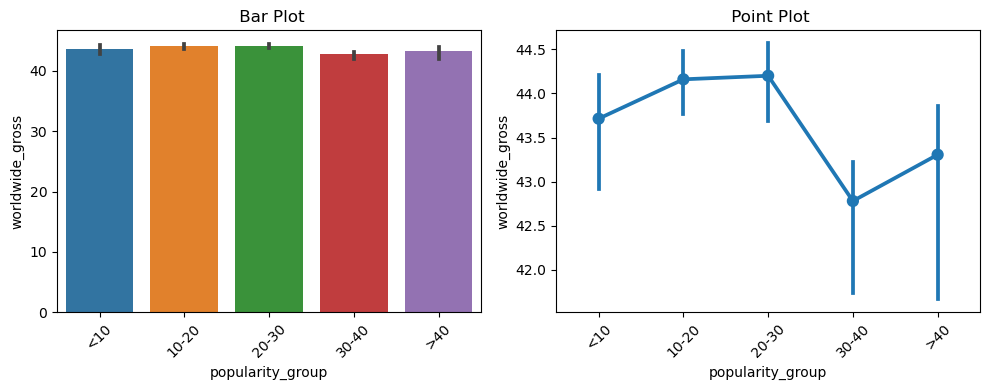

In [434]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = 'popularity_group', y = 'worldwide_gross', data = top4_split_merge_tn_tmdb_movie_basics, 
            errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  
ax[0].set_title(' Bar Plot')

sns.pointplot(x = 'popularity_group', y = 'worldwide_gross', data = top4_split_merge_tn_tmdb_movie_basics,
             errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[1])

ax[1].set_title(' Point Plot')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45) 
plt.tight_layout()
plt.show()

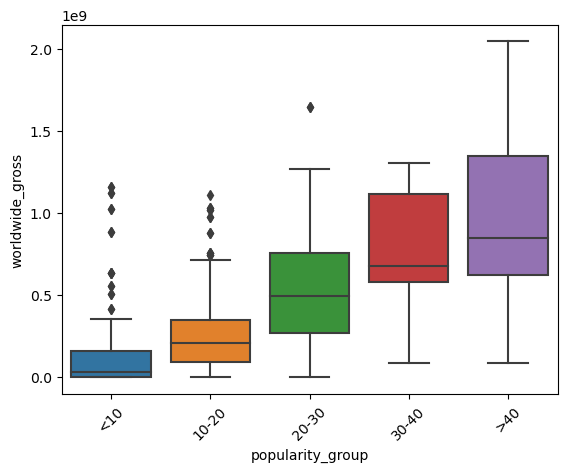

In [436]:
sns.boxplot(x = 'popularity_group', y = 'worldwide_gross' , 
            data = top4_split_merge_tn_tmdb_movie_basics, orient = 'v')
plt.xticks(rotation=45)
plt.title('')
plt.show()

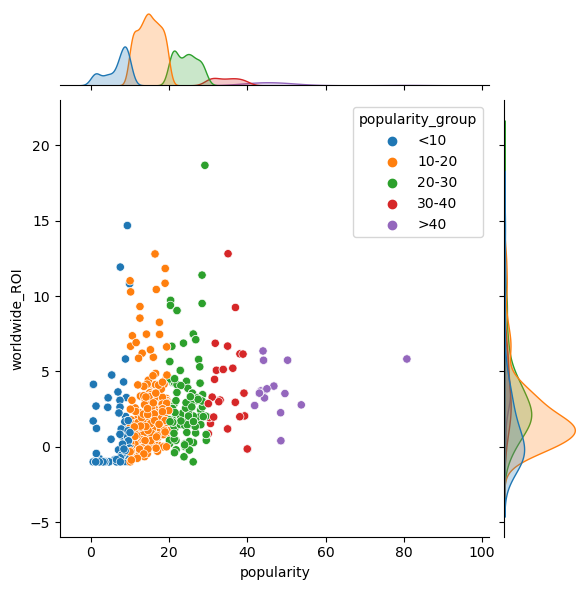

In [432]:
sns.jointplot(x = 'popularity', y = 'worldwide_ROI', hue = 'popularity_group', data = top4_split_merge_tn_tmdb_movie_basics)
plt.show()

In [446]:
# Genre = Animation:
animation_top4_df = top4_split_merge_tn_tmdb_movie_basics[top4_split_merge_tn_tmdb_movie_basics['each_genre']=="Animation"]
animation_top4_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre,popularity_group
33,15,"Nov 24, 2010",Tangled,260000000.0,200821936.0,5.864772e+08,11,2010,Tangled2010,385655304.0,...,Tangled2010,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Tangled2010,Animation,20-30
86,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,6,2018,Incredibles 22018,633938967.0,...,Incredibles 22018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",Incredibles 22018,Animation,30-40
94,46,"Jun 17, 2016",Finding Dory,200000000.0,486295561.0,1.021215e+09,6,2016,Finding Dory2016,534919632.0,...,Finding Dory2016,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",Finding Dory2016,Animation,10-20
97,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09,6,2010,Toy Story 32010,653874642.0,...,Toy Story 32010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Toy Story 32010,Animation,20-30
116,53,"Jun 21, 2013",Monsters University,200000000.0,268488329.0,7.435883e+08,6,2013,Monsters University2013,475100000.0,...,Monsters University2013,tt1453405,Monsters University,Monsters University,2013,104.0,"Adventure,Animation,Comedy",Monsters University2013,Animation,20-30


In [472]:
animation_top4_df.describe().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,id_x,production_budget,domestic_gross,worldwide_gross,release_month_x,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,Unnamed: 0,id_y,popularity,vote_average,vote_count,release_month_y,start_year,runtime_minutes
count,104.000000,104.00,104.00,104.00,104.000000,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.00
mean,43.711538,"100,836,538.46","143,409,037.04","395,529,720.53",7.634615,"252,120,683.49","42,572,498.58","151,284,145.03","294,693,182.07",0.42,1.36,2.78,12246.615385,186767.096154,15.899144,6.497115,3142.096154,7.471154,2014.144231,95.19
std,28.187539,"56,348,966.54","113,081,544.38","309,559,587.41",3.309468,"209,159,957.77","91,119,348.78","180,767,831.26","277,662,300.38",1.08,1.94,2.83,7686.980556,124138.986570,6.974645,0.962143,2989.785986,3.364454,2.470872,8.35
min,1.000000,"1,500,000.00",0.00,0.00,1.000000,0.00,"-128,607,242.00","-131,843,000.00","-110,450,242.00",-1.00,-1.00,-1.00,1.000000,10191.000000,0.600000,0.800000,2.000000,1.000000,2010.000000,63.00
25%,20.000000,"60,000,000.00","62,825,238.25","140,937,370.50",5.750000,"76,293,127.50","-10,919,432.00","14,165,752.00","82,612,686.50",-0.24,0.16,0.93,5215.500000,73808.750000,11.344000,5.975000,883.500000,5.000000,2012.000000,90.00
50%,42.500000,"92,500,000.00","123,282,363.50","338,960,585.50",8.000000,"205,437,550.00","22,531,518.50","79,536,592.50","219,150,134.00",0.20,0.85,2.00,13360.000000,171536.000000,15.275000,6.600000,1880.000000,7.000000,2014.000000,95.00
75%,63.750000,"145,000,000.00","193,793,640.25","566,079,098.50",11.000000,"376,966,718.25","63,793,309.25","251,650,000.00","455,831,982.75",0.70,2.04,3.48,17739.750000,281433.000000,18.934500,7.025000,4305.750000,11.000000,2016.000000,101.25
max,99.000000,"260,000,000.00","608,581,744.00","1,272,469,910.00",12.000000,"871,731,901.00","408,581,744.00","750,290,403.00","1,122,469,910.00",4.14,10.14,14.68,24573.000000,446894.000000,36.920000,8.200000,12691.000000,12.000000,2018.000000,118.00


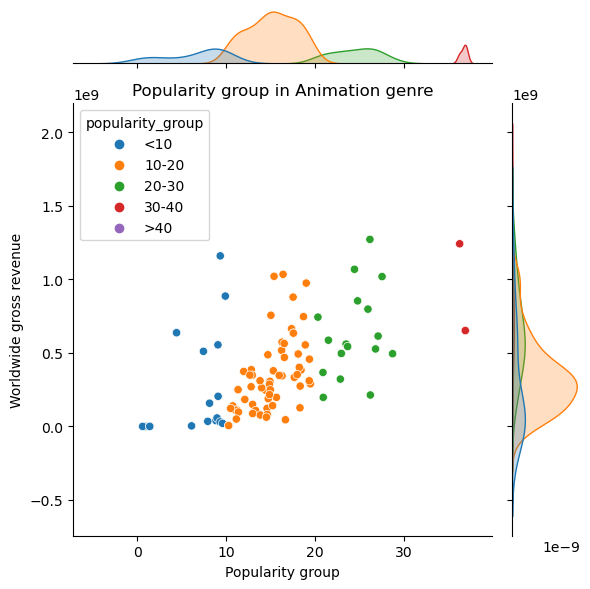

In [467]:
#Animation:
sns.jointplot(x = 'popularity', y = 'worldwide_gross', hue = 'popularity_group', data = animation_top4_df)
plt.title('Popularity group in Animation genre')
plt.xlabel('Popularity group')
plt.ylabel('Worldwide gross revenue')
plt.tight_layout()
plt.show()

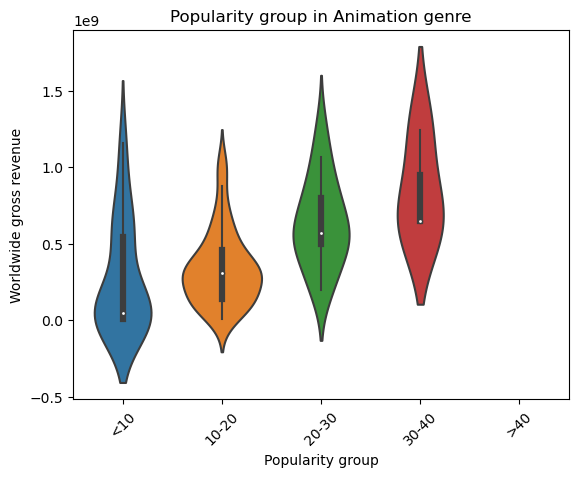

In [463]:
#Animation:
sns.violinplot(x = 'popularity_group', y = 'worldwide_gross', data = animation_top4_df)
plt.xticks(rotation=45)
plt.title('Popularity group in Animation genre')
plt.xlabel('Popularity group')
plt.ylabel('Worldwide gross revenue')
plt.show()

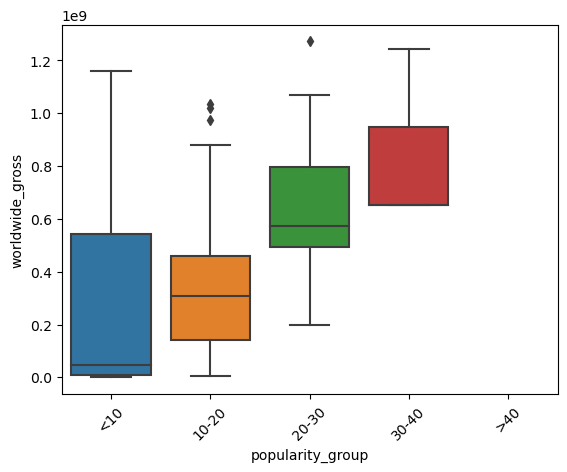

In [471]:
#Animation:
sns.boxplot(x = 'popularity_group', y = 'worldwide_gross' , 
            data = animation_top4_df, orient = 'v')

plt.xticks(rotation=45)
plt.title('')
plt.show()


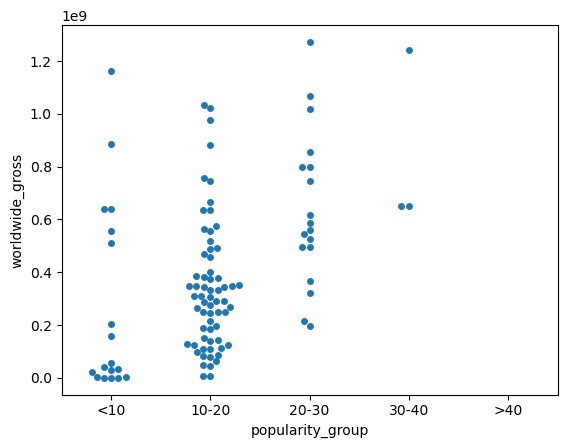

In [468]:
#Animation:
sns.swarmplot(x = 'popularity_group', y = 'worldwide_gross', 
            data = animation_top4_df)
plt.show()

# Popularity vs ROI

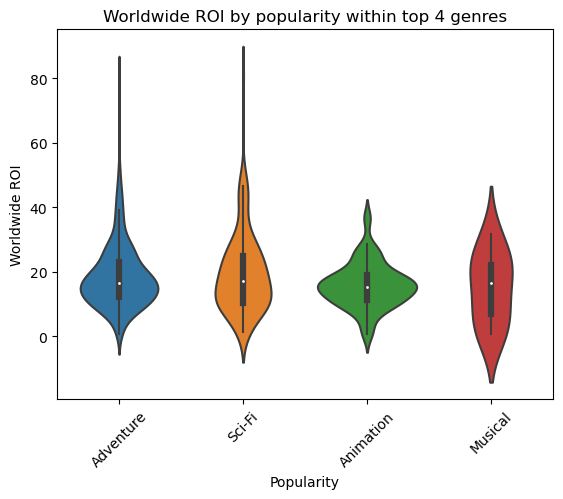

In [388]:
sns.violinplot(x = 'each_genre', y = 'popularity', data = top4_split_merge_tn_tmdb_movie_basics)
plt.xticks(rotation=45)
plt.title('Worldwide ROI by popularity within top 4 genres')
plt.xlabel('Popularity')
plt.ylabel('Worldwide ROI')
plt.show()

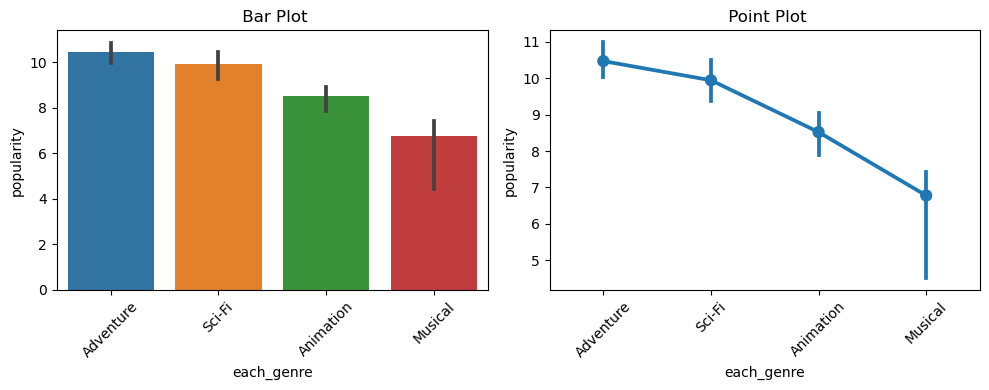

In [390]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = 'each_genre', y = 'popularity', data = top4_split_merge_tn_tmdb_movie_basics, 
            errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  
ax[0].set_title(' Bar Plot')

sns.pointplot(x = 'each_genre', y = 'popularity', data = top4_split_merge_tn_tmdb_movie_basics,
             errorbar=('ci', 99.99), estimator = another_fun_estimator, ax = ax[1])

ax[1].set_title(' Point Plot')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45) 
plt.tight_layout()
plt.show()

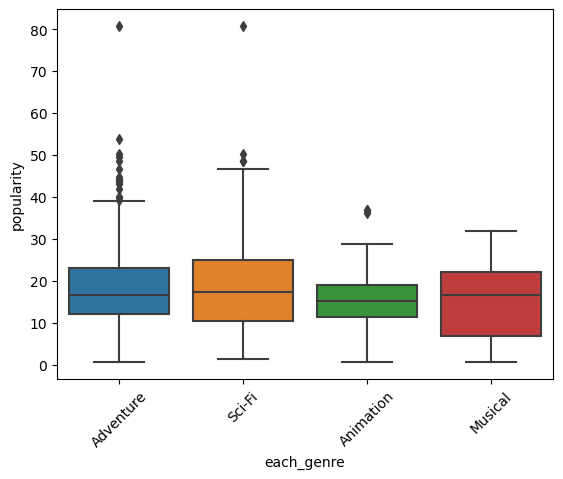

In [391]:
sns.boxplot(x = 'each_genre', y = 'popularity' , 
            data = top4_split_merge_tn_tmdb_movie_basics, orient = 'v')
plt.xticks(rotation=45)
plt.title('')
plt.show()

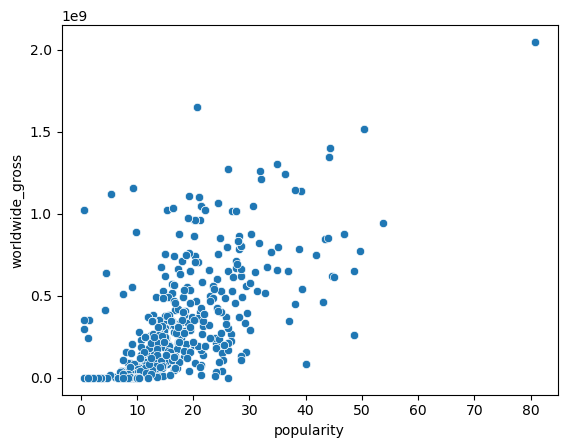

In [400]:
sns.scatterplot(x = 'popularity', y = 'worldwide_gross', data = top4_split_merge_tn_tmdb_movie_basics )
plt.show()

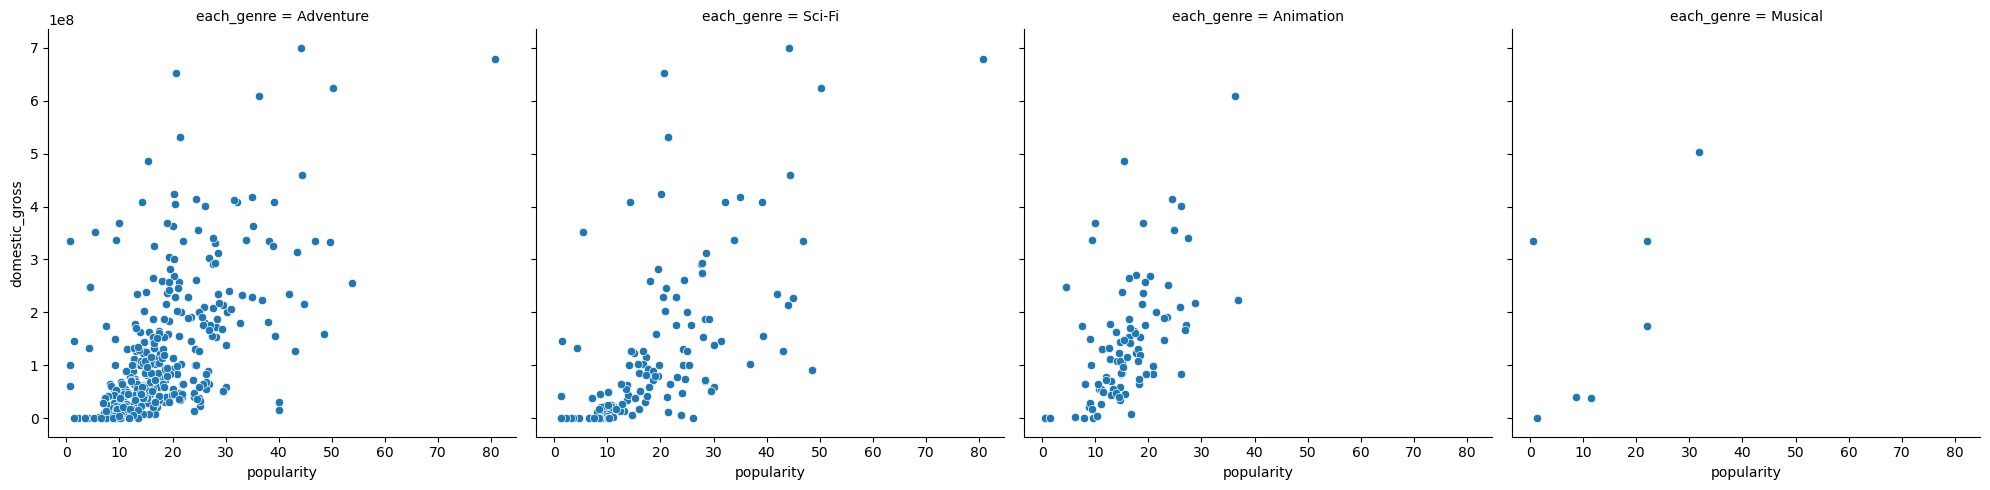

In [402]:
sns.relplot(x = 'popularity', y = 'domestic_gross', col = 'each_genre', data = top4_split_merge_tn_tmdb_movie_basics)
plt.show()

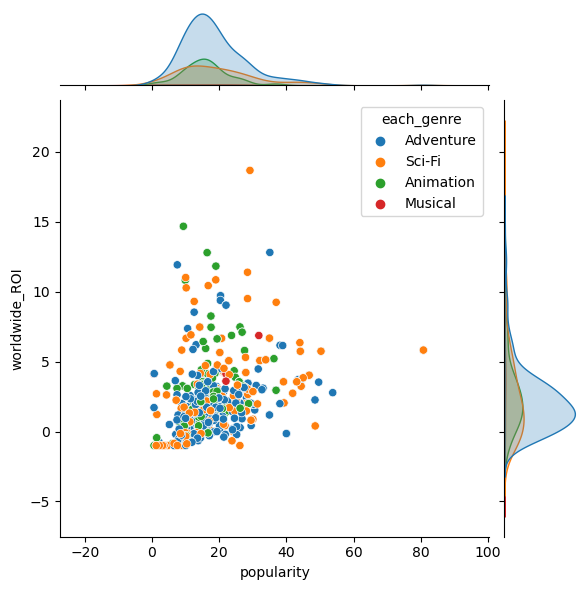

In [398]:
sns.jointplot(x = 'popularity', y = 'worldwide_ROI', hue = 'each_genre', data = top4_split_merge_tn_tmdb_movie_basics)
plt.show()

# Popularity by each genre:

In [399]:
#ANIMATION:
Animation_popularity_df = top4_split_merge_tn_tmdb_movie_basics[top4_split_merge_tn_tmdb_movie_basics['each_genre']=="Animation"]
Animation_popularity_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,release_year_y,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre
33,15,"Nov 24, 2010",Tangled,260000000.0,200821936.0,5.864772e+08,11,2010,Tangled2010,385655304.0,...,2010,Tangled2010,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Tangled2010,Animation
86,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,6,2018,Incredibles 22018,633938967.0,...,2018,Incredibles 22018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",Incredibles 22018,Animation
94,46,"Jun 17, 2016",Finding Dory,200000000.0,486295561.0,1.021215e+09,6,2016,Finding Dory2016,534919632.0,...,2016,Finding Dory2016,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",Finding Dory2016,Animation
97,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09,6,2010,Toy Story 32010,653874642.0,...,2010,Toy Story 32010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Toy Story 32010,Animation
116,53,"Jun 21, 2013",Monsters University,200000000.0,268488329.0,7.435883e+08,6,2013,Monsters University2013,475100000.0,...,2013,Monsters University2013,tt1453405,Monsters University,Monsters University,2013,104.0,"Adventure,Animation,Comedy",Monsters University2013,Animation
